## Importing Library

In [10]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import seaborn as sns

In [1]:
# import ipywidgets as widgets
# from ipywidgets import interact, interact_manual

In [74]:
rf=pd.read_csv('C:/Users/Sameer Kataria/Desktop/New folder/RF_total.csv', parse_dates=["Date"])

### NIFTY50 Ticker Import

In [3]:

Tickers_nifty = pd.read_csv("C:/Users/Sameer Kataria/Desktop/New folder/nifty50_tickers.csv")
ticker_list = Tickers_nifty['Ticker'].to_list()
ticker_list = [s + '.NS' for s in ticker_list]

In [4]:
def get_ticker_data(start_date, end_date):
    df = yf.download(" ".join(ticker_list), start = start_date, end = end_date, interval="1d")["Adj Close"]
    df_index = yf.download("^NSEI", start=start_date, end=end_date, interval="1d")["Adj Close"]
    
    return df, df_index

In [73]:
df, df_index = get_ticker_data("2010-01-01", "2021-12-01")
df

[*********************100%***********************]  50 of 50 completed
[*********************100%***********************]  1 of 1 completed


,ADANIPORTS.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,CIPLA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,104.207397,161.931580,181.382095,639.060120,347.893127,30.862938,281.826508,62.784206,142.882507,318.082794,...,140.712250,79.272255,153.140793,458.091949,299.748260,210.172485,65.893379,922.355286,100.624146,138.392899
2010-01-05,107.801086,162.443085,185.166595,642.011780,348.667419,30.656046,286.289581,61.838699,143.096619,312.381775,...,144.941101,85.418625,150.472473,469.187347,299.827972,212.863846,67.244629,941.449646,105.558678,140.577057
2010-01-06,113.144814,161.954269,182.058548,632.086670,340.440643,31.096815,283.256439,60.907658,141.795013,325.008972,...,146.822113,86.754784,150.704086,464.091370,293.048523,213.911636,68.327011,942.595276,103.682983,137.734619
2010-01-07,111.806541,160.302017,183.347488,620.999329,337.779114,30.907913,285.466278,59.725788,141.212723,322.323364,...,144.586365,87.059593,145.552780,469.693207,284.893341,209.206863,70.025917,934.050537,102.701851,135.291092
2010-01-08,111.675514,162.950089,185.742508,610.723694,338.746918,31.470116,281.696472,60.738827,141.525269,321.428131,...,147.022827,87.493835,146.349548,468.717438,279.071075,214.712875,69.379272,945.459412,102.066994,133.256485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,762.450012,3144.250000,679.900024,3391.699951,17368.849609,7125.799805,765.150024,400.100006,3573.399902,899.950012,...,782.900024,807.799988,492.750000,1173.650024,3445.899902,1559.349976,2397.800049,7608.799805,727.299988,636.700012
2021-11-26,717.150024,3143.100098,661.750000,3334.600098,16682.550781,6807.049805,738.750000,376.850006,3555.300049,966.700012,...,767.299988,766.700012,460.200012,1112.300049,3446.850098,1527.400024,2292.300049,7394.750000,703.799988,621.450012
2021-11-29,702.599976,3144.300049,651.099976,3298.199951,16890.400391,6905.750000,739.349976,367.450012,3528.600098,965.000000,...,751.049988,766.000000,461.450012,1114.750000,3502.000000,1536.650024,2324.199951,7388.250000,689.349976,630.599976


In [6]:
## Creating a function to generates the top 5 performing stocks from NIFTY50 till date

def top_5_stocks(data):
    list_returns=[]
    for stock in data.columns:
        list_returns.append([stock,(data[stock][-1]-data[stock][0])/data[stock][0]])
    list_returns = [[tick,item] for tick,item in list_returns if str(item) != 'nan'] 
    df = sorted(list_returns, key = lambda x: x[1], reverse=True)
    df=df[:5]
    df=[tick for tick, item in df]
    return df

In [7]:
## Visualize the return distribution of the stocks from NIFTY50 over the period

def distribution_function(tickers, data):
    for ticker in tickers:
        plt.figure(figsize=(8,6))
        sns.histplot(data[ticker].pct_change(), bins=10, color="red")
        plt.axvline(data[ticker].pct_change().mean(), color='black', linestyle='dashed', linewidth=1)
        plt.axvline(data[ticker].pct_change().median(), color='yellow', linestyle='dashed', linewidth=1)
        ax=plt.gca()
        plt.text(0.8, 0.8, 'Mean: {}'.format(round(data[ticker].pct_change().mean(),3)), fontsize = 11.5, transform=ax.transAxes )
        plt.text(0.8, 0.75, 'Median: {}'.format(round(data[ticker].pct_change().median(),3)), fontsize = 11.5, transform=ax.transAxes)
        plt.title("Monthly Returns distribution of {}".format(ticker))
        plt.xlabel("")
        plt.show()     

In [8]:
## Compute the cummulative returns for the stock

def cumreturn_function(tickers,data):
    for ticker in tickers:
        plt.figure(figsize=(8,6))
        sns.lineplot(data=(1+data[ticker].pct_change()).cumprod(), color="red")
        plt.title("Cumilative returns of {}".format(ticker))
        plt.ylabel(" ")
        plt.show()

In [15]:
df_1=df.resample("M").last()

## Return Distribution

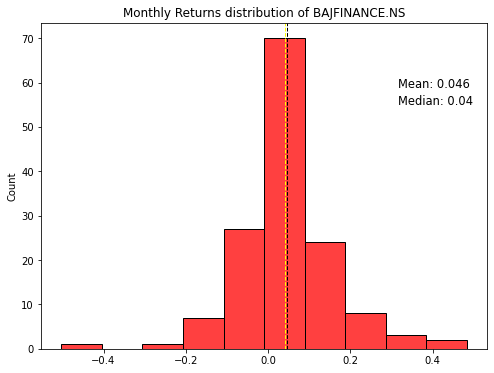

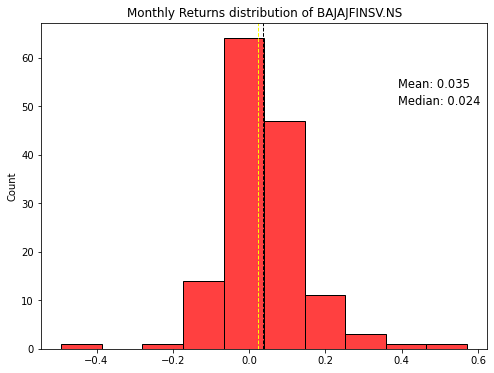

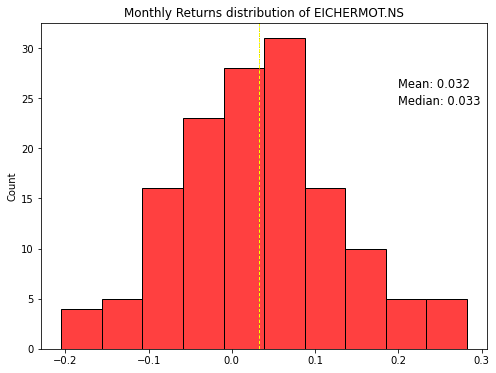

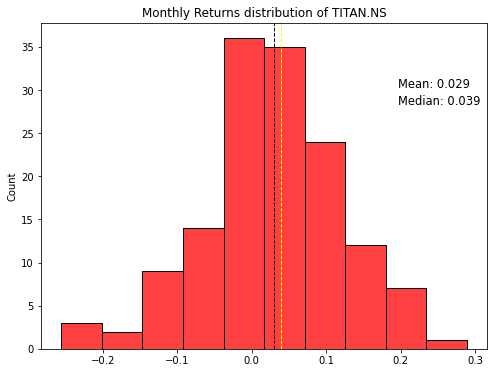

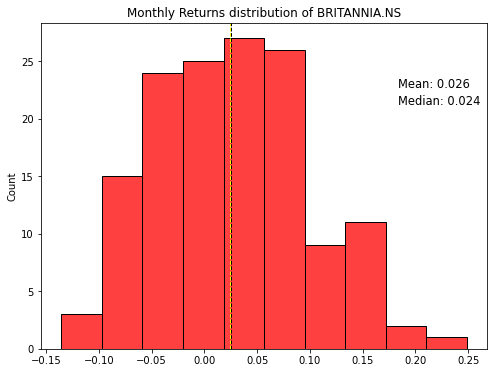

In [16]:
distribution_function(top_5_stocks(df_1),df_1)

## Cummulative Return

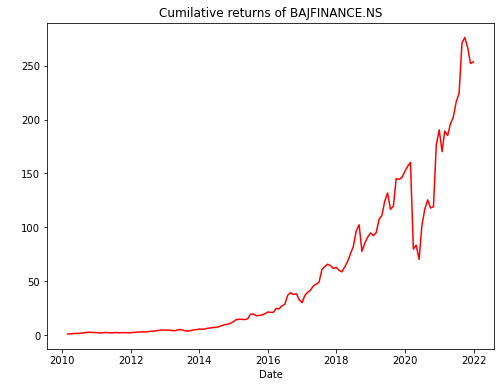

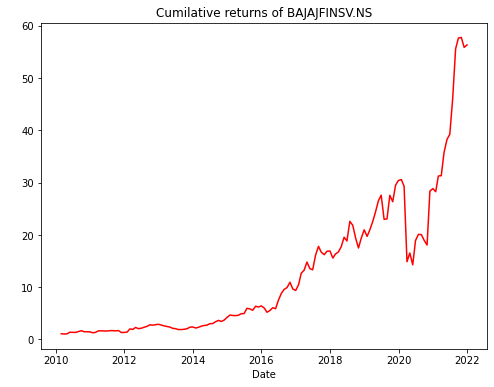

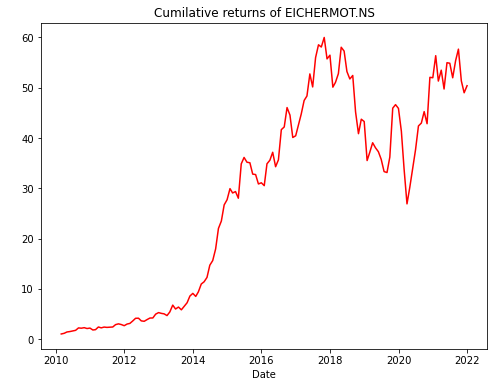

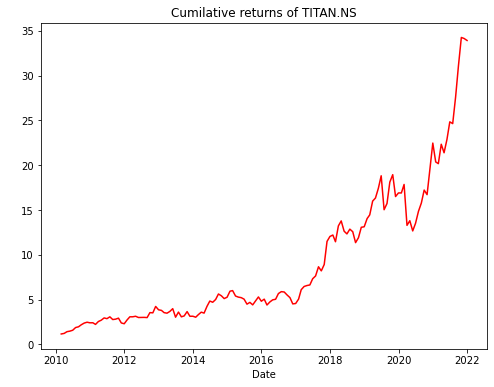

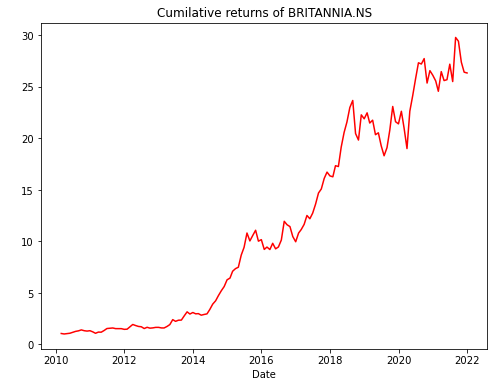

In [18]:
cumreturn_function(top_5_stocks(df_1),df_1)

In [100]:
## Function to implement Momentum strategy and return the top recommendations for investment

def reb_stock_list(date, df):
    #Please enter date in end of month format
    #For stocks to invest in December enter date as end of November(2021-11-30)
    date_1 = date.split('-')
    y = int(date_1[0])
    m = int(date_1[1])
    d = int(date_1[2])
    reb_date = dt.datetime(y,m,d)
    stocks = df[df["Date"]==reb_date]["Ticker"].to_list()
    return stocks

def month_wise_12m_investing(df, month_number):
    temp_1 = df.reset_index()
    temp_1["month"] = temp_1["Date"].dt.month
    month = temp_1[temp_1["month"]==9]
    month["ret12"]=(1+month["RET_RollProd_Forward_12"]).cumprod()
    plt.plot(month["Date"], month["ret12"])

def momentum_unleash(df, period, qcut, rebalance_date):
    ## Resample by period
    df = df.resample(period).last()
    
    if period == 'M':
        roll = 12
    elif period == '3M':
        roll = 4
    elif period == '6M':
        roll = 2
    elif period == '12M':
        roll = 1
    
    ## Data preparation
    daily_data=pd.melt(df, ignore_index=False)
    daily_data=daily_data.reset_index()
    daily_data.rename(columns={"value":"Adj Close", "variable":"Ticker"}, inplace=True) # Rename columns
    daily_data["Return"]=daily_data.groupby("Ticker")["Adj Close"].pct_change() # Create return column
    
    #######################
    ## Momentum Strategy ##
    #######################
    
    ## Computing Rolling Product of returns
    daily_data['RET_plus_1'] = daily_data['Return']+1 #Adding 1 to each returns for calculating the rolling period returns

    ## Calculating the cummulative historical period returns on rolling-basis (i.e. stock’s return over the months T-12 to T-1)
    daily_data['RET_RollProd_Past_12m'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(1).rolling(roll).apply(lambda x : x.prod()))-1
    
    ## Calculating the cummulative future period returns on rolling-basis (i.e.,  compound return over the next 'X' months, where X=1, 3, 6, 12 and 60)
    daily_data['RET_RollProd_Forward_1'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(0).rolling(1).apply(lambda x : x.prod()))-1
    daily_data['RET_RollProd_Forward_3'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-2).rolling(3).apply(lambda x : x.prod()))-1
    daily_data['RET_RollProd_Forward_6'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-5).rolling(6).apply(lambda x : x.prod()))-1
    daily_data['RET_RollProd_Forward_12'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-11).rolling(12).apply(lambda x : x.prod()))-1
    # daily_data['RET_RollProd_Forward_60'] = (daily_data.groupby('Ticker')['RET_plus_1'].shift(-60).rolling(60).apply(lambda x : x.prod()))-1

    daily_data.dropna(subset=["RET_RollProd_Past_12m"], inplace=True) # compute 12 month return rolling product
    daily_data.reset_index(drop=True, inplace=True)
    
    ## Top, Bottom and Neither Deciles for all the stocks in a month
    daily_data['Deciles'] = daily_data.groupby('Date')['RET_RollProd_Past_12m'].transform(lambda x: pd.qcut(x, qcut, duplicates='drop', labels=False))
    daily_data.loc[daily_data['Deciles']==(qcut-1), 'Rank_Deciles'] = 'UP'
    daily_data.loc[daily_data['Deciles']==0, 'Rank_Deciles'] = 'DOWN'
    daily_data.loc[((daily_data['Deciles']>=1) & (daily_data['Deciles']<=(qcut-2))), 'Rank_Deciles'] = 'Neither'

    ## Seperating UP decile companies into separate dataframes
    daily_data_UP = daily_data[daily_data['Rank_Deciles']=='UP']
    
    ## Create equal weighted portfolio return from UP protfolio
    Eq_wtd_port_up = daily_data_UP.sort_values(['Date']).groupby('Date')[[ 'RET_RollProd_Forward_1', 'RET_RollProd_Forward_3', 'RET_RollProd_Forward_6', 'RET_RollProd_Forward_12']].agg('mean')
    
    ## Cummulative returns of momentum based portfolio
    Eq_wtd_port_up["ret_port"]=(1+Eq_wtd_port_up["RET_RollProd_Forward_1"]).cumprod()
    plt.plot(Eq_wtd_port_up.index, Eq_wtd_port_up["ret_port"], color='red') # Plot commulative returns till now
    plt.xlabel("year")
    plt.ylabel("cummulative returns")
    
    mean=Eq_wtd_port_up["RET_RollProd_Forward_1"].mean()*12
    stdev= Eq_wtd_port_up["RET_RollProd_Forward_1"].std()*np.sqrt(12)
    print("Sharpe Ratio from startdate to enddate is : {}".format(mean/stdev))
    print("Ann Return from startdate to enddateis : {}%".format(mean*100))
    
    ## Get Portfolio stocks for investment
    stocks = reb_stock_list(rebalance_date, daily_data_UP)
    
    print("\n Stock to Invest in for {}".format(rebalance_date)) 
    return stocks,Eq_wtd_port_up

In [37]:
period = str(input("Enter Period: ") or "M")
qcut = int(input("Enter qcut: ") or 5)
date = input("Enter Date to invest: ")

Enter Period: 
Enter qcut: 
Enter Date to invest: 2021-12-31


Sharpe Ratio from startdate to enddate is : 1.2800622953561636
Ann Return from startdate to enddateis : 23.187884464327567%

 Stock to Invest in for 2021-12-31


['BAJAJFINSV.NS',
 'GRASIM.NS',
 'HINDALCO.NS',
 'JSWSTEEL.NS',
 'ONGC.NS',
 'SBIN.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'WIPRO.NS']

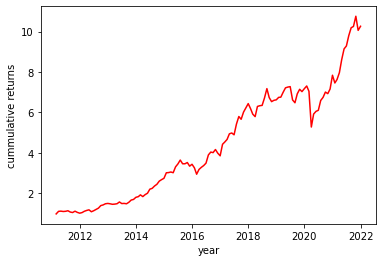

In [101]:
#momentum_unleash(df, 'M', 5, "2021-12-31")
stocks, portfolio = momentum_unleash(df, period, qcut, date)
stocks

## Applying CAPM to calculate portfolio metrics

In [96]:
capm_portfolio=portfolio.reset_index()[["Date","RET_RollProd_Forward_1"]]
capm_portfolio.rename(columns={'RET_RollProd_Forward_1':"Return"}, inplace=True)

In [75]:
df_index=df_index.resample("M").last().pct_change()

In [76]:
df_index=pd.DataFrame(df_index).reset_index()
df_index.rename(columns={"Adj Close":"Return_idx"}, inplace=True)

In [77]:
rf["Date"]=rf["Date"]+pd.offsets.MonthEnd(0)

In [79]:
Capm_data=pd.merge(pd.merge(capm_portfolio, rf[["Date","ROI M"]], how="left", on="Date"), df_index, how="left", on="Date")
Capm_data.head()

,Date,Return,ROI M,Return_idx
0,2011-02-28,-0.030594,0.001098,-0.031357
1,2011-03-31,0.130548,0.001098,0.093845
2,2011-04-30,0.010369,0.001098,-0.014442
3,2011-05-31,-0.015972,0.001098,-0.048074
4,2011-06-30,0.008310,0.001098,0.031847


In [81]:
Capm_data["ROI M"]=Capm_data['ROI M'].ffill()
Capm_data.tail()

,Date,Return,ROI M,Return_idx
126,2021-08-31,0.039844,0.003615,0.086858
127,2021-09-30,0.006395,0.003615,0.028365
128,2021-10-31,0.049267,0.003615,0.003037
129,2021-11-30,-0.064989,0.003615,-0.038958
130,2021-12-31,0.020162,0.003615,0.010817


In [82]:
Capm_data["RET_Exc"]=Capm_data["Return"]-Capm_data["ROI M"]
Capm_data["RET_idx_Exc"]=Capm_data["Return_idx"]-Capm_data["ROI M"]
Capm_data.head()

,Date,Return,ROI M,Return_idx,RET_Exc,RET_idx_Exc
0,2011-02-28,-0.030594,0.001098,-0.031357,-0.031693,-0.032456
1,2011-03-31,0.130548,0.001098,0.093845,0.129450,0.092747
2,2011-04-30,0.010369,0.001098,-0.014442,0.009271,-0.015540
3,2011-05-31,-0.015972,0.001098,-0.048074,-0.017070,-0.049172
4,2011-06-30,0.008310,0.001098,0.031847,0.007212,0.030748


## Running Regression to compute Alpha and Beta

In [97]:
reg_model=sm.ols(formula="RET_Exc ~ RET_idx_Exc", data=Capm_data).fit()

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RET_Exc   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     164.8
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           8.15e-25
Time:                        02:55:59   Log-Likelihood:                 255.20
No. Observations:                 131   AIC:                            -506.4
Df Residuals:                     129   BIC:                            -500.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0106      0.003      3.476      0.001       0.005       0.017
RET_idx_Exc     0.7823      0.061     12.838      0.000       0.662       0.903
==============================================================================
Omnibus:                        3.030   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.588
Skew:                          -0.226   Prob(JB):                        0.274
Kurtosis:                       3.519   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
print('\033[1m' + "Alpha of the portfolio is {}%".format(round(reg_model.params["Intercept"]*100,4)))
print('\033[1m' + "Beta of the portfolio is {}".format(round(reg_model.params["RET_idx_Exc"],2)))

Alpha of the portfolio is 1.0629%
Beta of the portfolio is 0.78
